In [ ]:
!pwd

/content


In [1]:
!unzip Fake.zip

Archive:  Fake.zip
   creating: Fake/
  inflating: Fake/Vl_NT_IP_wg_E_20_155.mp4  
  inflating: __MACOSX/Fake/._Vl_NT_IP_wg_E_20_155.mp4  
  inflating: Fake/Mf_NT_HS_wg_E_20_74.mp4  
  inflating: __MACOSX/Fake/._Mf_NT_HS_wg_E_20_74.mp4  
  inflating: Fake/Vm_NT_HS_g_E_21_165.mp4  
  inflating: __MACOSX/Fake/._Vm_NT_HS_g_E_21_165.mp4  
  inflating: Fake/Mu_T_HS_g_E_20_94.mp4  
  inflating: __MACOSX/Fake/._Mu_T_HS_g_E_20_94.mp4  
  inflating: Fake/Pq_NT_ZTE_g_E_20_117.mp4  
  inflating: __MACOSX/Fake/._Pq_NT_ZTE_g_E_20_117.mp4  
  inflating: Fake/Vl_NT_HW_g_E_20_149.mp4  
  inflating: __MACOSX/Fake/._Vl_NT_HW_g_E_20_149.mp4  
  inflating: Fake/Mu_T_HW_g_E_20_95.mp4  
  inflating: __MACOSX/Fake/._Mu_T_HW_g_E_20_95.mp4  
  inflating: Fake/Mf_NT_ZTE_wg_E_20_80.mp4  
  inflating: __MACOSX/Fake/._Mf_NT_ZTE_wg_E_20_80.mp4  
  inflating: Fake/Vm_NT_IP_g_E_21_174.mp4  
  inflating: __MACOSX/Fake/._Vm_NT_IP_g_E_21_174.mp4  
  inflating: Fake/Mu_T_IP_g_E_20_97.mp4  
  inflating: __MACOSX/Fake/._Mu

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip Real.zip

Archive:  Real.zip
   creating: Real/
  inflating: Real/G_NT_HS_wg_E_21_17.mp4  
  inflating: __MACOSX/Real/._G_NT_HS_wg_E_21_17.mp4  
  inflating: Real/G_NT_HS_g_E_21_12.mp4  
  inflating: __MACOSX/Real/._G_NT_HS_g_E_21_12.mp4  
  inflating: Real/G_NT_HS_g_E_21_13.mp4  
  inflating: __MACOSX/Real/._G_NT_HS_g_E_21_13.mp4  
  inflating: Real/G_NT_HS_wg_E_21_16.mp4  
  inflating: __MACOSX/Real/._G_NT_HS_wg_E_21_16.mp4  
  inflating: Real/G_NT_HS_g_E_21_11.mp4  
  inflating: __MACOSX/Real/._G_NT_HS_g_E_21_11.mp4  
  inflating: Real/G_NT_5s_wg_E_20_8.mp4  
  inflating: __MACOSX/Real/._G_NT_5s_wg_E_20_8.mp4  
  inflating: Real/.DS_Store          
  inflating: __MACOSX/Real/._.DS_Store  
  inflating: Real/G_NT_HS_g_E_21_14.mp4  
  inflating: __MACOSX/Real/._G_NT_HS_g_E_21_14.mp4  
  inflating: Real/G_NT_HW_wg_E_20_30.mp4  
  inflating: __MACOSX/Real/._G_NT_HW_wg_E_20_30.mp4  
  inflating: Real/G_NT_HS_g_E_21_15.mp4  
  inflating: __MACOSX/Real/._G_NT_HS_g_E_21_15.mp4  
  inflating: Real/G_NT

# New section

In [3]:
import cv2
import os

def extract_frames(video_path, output_folder, label, interval=30):
    cap = cv2.VideoCapture(video_path)
    count = 0
    success = True
    while success:
        success, frame = cap.read()
        if success and count % interval == 0:
            frame_filename = os.path.join(output_folder, f"{label}_{os.path.basename(video_path).split('.')[0]}_{count}.jpg")
            cv2.imwrite(frame_filename, frame)
        count += 1
    cap.release()

def process_videos(input_folder, output_folder, label, interval=30):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    for filename in os.listdir(input_folder):
        if filename.endswith(".mp4"):
            extract_frames(os.path.join(input_folder, filename), output_folder, label, interval)

process_videos('dataset/Real', 'processed_dataset/Real', 'Real')
process_videos('dataset/Fake', 'processed_dataset/Fake', 'Fake')


In [ ]:
import os
import shutil
import random

def split_data(source_dir, train_dir, val_dir, split_ratio=0.8):
    files = os.listdir(source_dir)
    random.shuffle(files)
    split_index = int(len(files) * split_ratio)

    train_files = files[:split_index]
    val_files = files[split_index:]

    for file in train_files:
        shutil.move(os.path.join(source_dir, file), os.path.join(train_dir, file))

    for file in val_files:
        shutil.move(os.path.join(source_dir, file), os.path.join(val_dir, file))

split_data('processed_dataset/Real', 'processed_dataset/train/Real', 'processed_dataset/val/Real')
split_data('processed_dataset/Fake', 'processed_dataset/train/Fake', 'processed_dataset/val/Fake')


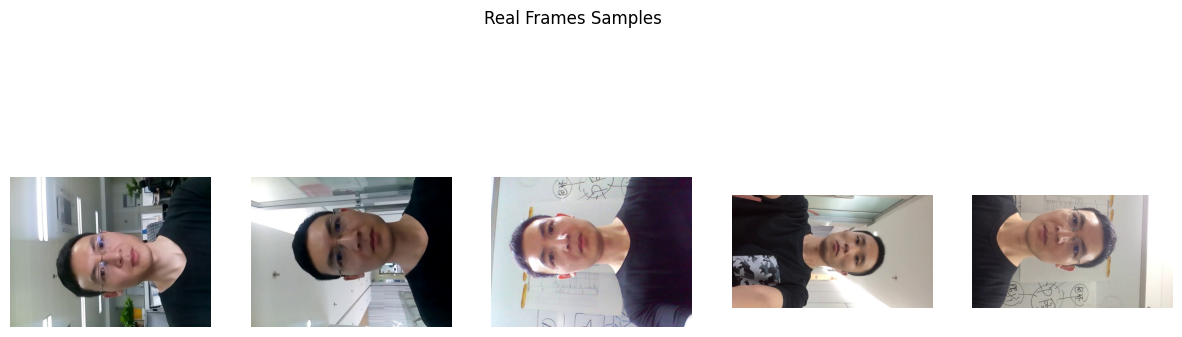

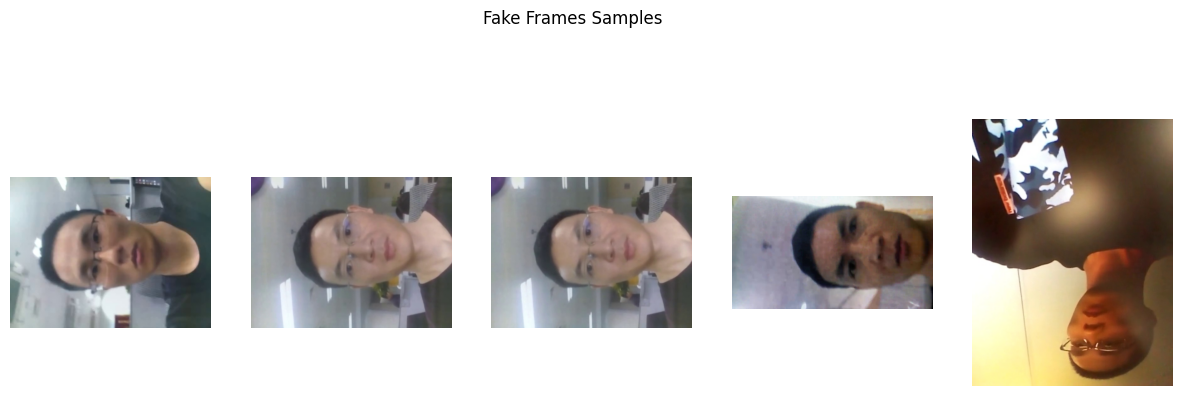

In [4]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Paths to the folders
real_frames_path = 'processed_dataset/Real'
fake_frames_path = 'processed_dataset/Fake'

# Function to get random samples from a folder
def get_random_samples(folder_path, num_samples=5):
    files = os.listdir(folder_path)
    selected_files = random.sample(files, min(num_samples, len(files)))
    return [os.path.join(folder_path, f) for f in selected_files]

# Function to display images
def display_images(images, title):
    plt.figure(figsize=(15, 5))
    for i, image_path in enumerate(images):
        img = Image.open(image_path)
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Number of samples to display
num_samples = 5

# Get random samples from both folders
real_samples = get_random_samples(real_frames_path, num_samples)
fake_samples = get_random_samples(fake_frames_path, num_samples)

# Display the samples
display_images(real_samples, 'Real Frames Samples')
display_images(fake_samples, 'Fake Frames Samples')


In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = 'processed_dataset/train'
val_dir = 'processed_dataset/val'
augmented_train_dir = 'augmented_dataset/train'
augmented_val_dir = 'augmented_dataset/val'

# Create directories for augmented data
os.makedirs(augmented_train_dir, exist_ok=True)
os.makedirs(augmented_val_dir, exist_ok=True)

# Define the augmentation configuration
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    channel_shift_range=20.0,
    rescale=1.0/255.0
)

def augment_and_save(directory, save_to_dir, datagen, num_augmented_images=5):
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        save_class_dir = os.path.join(save_to_dir, class_name)
        os.makedirs(save_class_dir, exist_ok=True)

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            img = np.expand_dims(img, axis=0)  # Add batch dimension

            # Create the augmented images
            i = 0
            for batch in datagen.flow(img, batch_size=1, save_to_dir=save_class_dir, save_prefix='aug', save_format='jpeg'):
                i += 1
                if i >= num_augmented_images:
                    break  # Stop after generating the specified number of augmented images

# Apply augmentations to both train and validation sets
augment_and_save(train_dir, augmented_train_dir, datagen, num_augmented_images=5)
augment_and_save(val_dir, augmented_val_dir, datagen, num_augmented_images=2)

print("Augmentation complete. Augmented images saved to 'augmented_dataset'.")


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.0/869.0 kB 35.0 MB/s eta 0:00:00


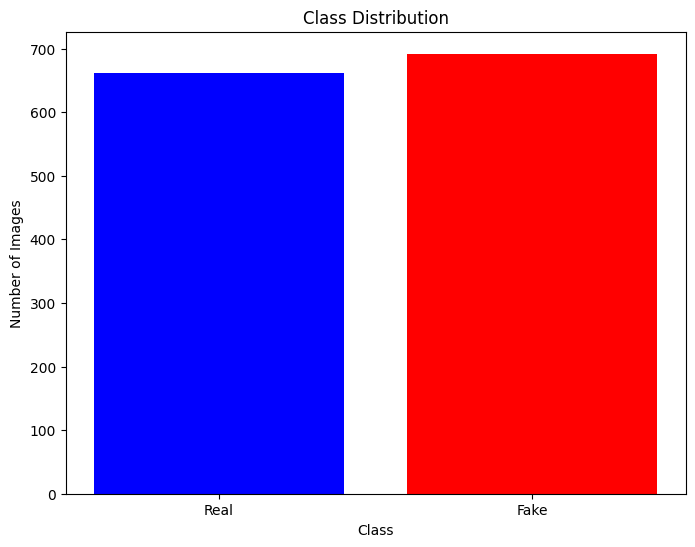

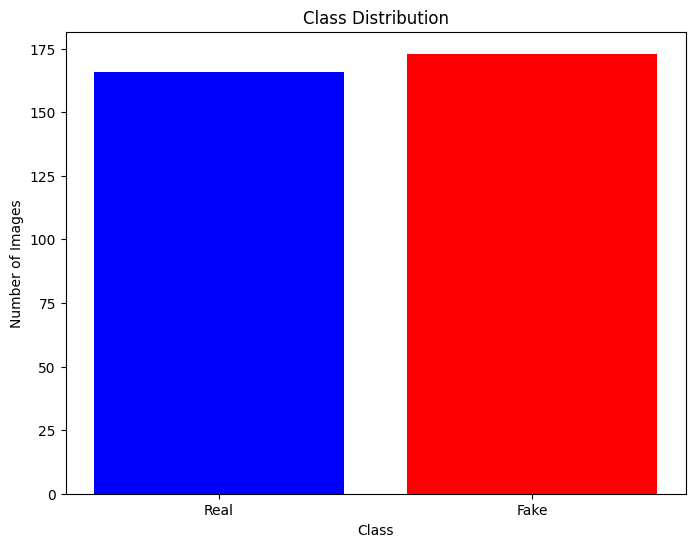

In [ ]:
import os
import matplotlib.pyplot as plt

def plot_class_distribution(base_dir):
    classes = ['Real', 'Fake']
    class_counts = []

    for cls in classes:
        class_dir = os.path.join(base_dir, cls)
        count = len(os.listdir(class_dir))
        class_counts.append(count)

    plt.figure(figsize=(8, 6))
    plt.bar(classes, class_counts, color=['blue', 'red'])
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.show()

# Analyze class distribution in training set
plot_class_distribution('processed_dataset/train')

# Analyze class distribution in validation set
plot_class_distribution('processed_dataset/val')


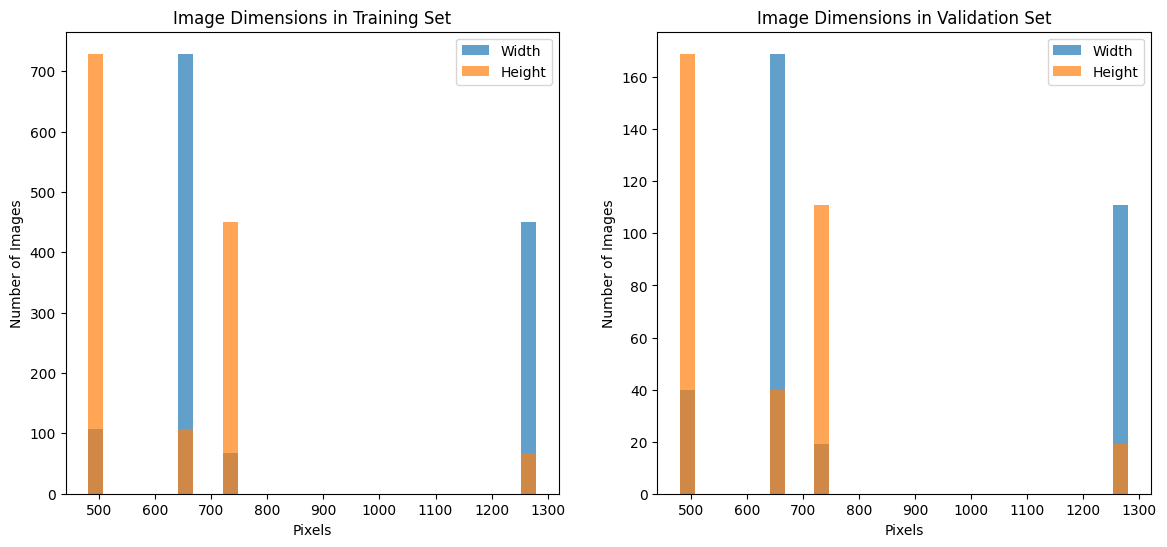

In [ ]:
import cv2
import pandas as pd

def analyze_image_dimensions(base_dir):
    dimensions = []

    for cls in ['Real', 'Fake']:
        class_dir = os.path.join(base_dir, cls)
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                dimensions.append((img.shape[1], img.shape[0]))  # width, height

    df = pd.DataFrame(dimensions, columns=['Width', 'Height'])
    return df

# Analyze dimensions in training set
df_train = analyze_image_dimensions('processed_dataset/train')
# Analyze dimensions in validation set
df_val = analyze_image_dimensions('processed_dataset/val')

# Plot the dimensions
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df_train['Width'], bins=30, alpha=0.7, label='Width')
plt.hist(df_train['Height'], bins=30, alpha=0.7, label='Height')
plt.title('Image Dimensions in Training Set')
plt.xlabel('Pixels')
plt.ylabel('Number of Images')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df_val['Width'], bins=30, alpha=0.7, label='Width')
plt.hist(df_val['Height'], bins=30, alpha=0.7, label='Height')
plt.title('Image Dimensions in Validation Set')
plt.xlabel('Pixels')
plt.ylabel('Number of Images')
plt.legend()

plt.show()


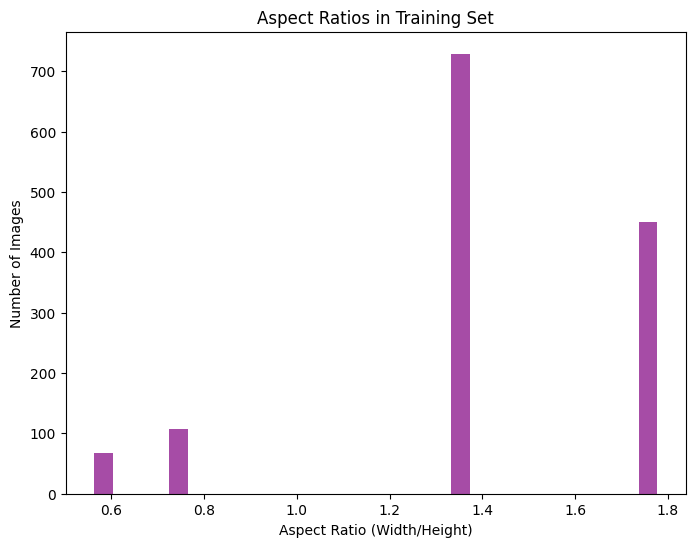

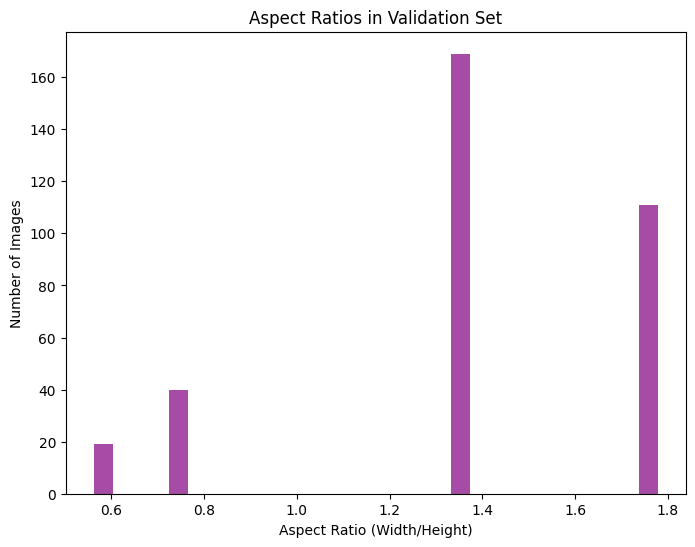

In [ ]:
def analyze_aspect_ratios(df, title):
    df['AspectRatio'] = df['Width'] / df['Height']

    plt.figure(figsize=(8, 6))
    plt.hist(df['AspectRatio'], bins=30, color='purple', alpha=0.7)
    plt.title(title)
    plt.xlabel('Aspect Ratio (Width/Height)')
    plt.ylabel('Number of Images')
    plt.show()

# Aspect ratio analysis for training set
analyze_aspect_ratios(df_train, 'Aspect Ratios in Training Set')

# Aspect ratio analysis for validation set
analyze_aspect_ratios(df_val, 'Aspect Ratios in Validation Set')


In [ ]:
def summary_statistics(df, set_name):
    stats = {
        'Mean Width': df['Width'].mean(),
        'Mean Height': df['Height'].mean(),
        'Std Width': df['Width'].std(),
        'Std Height': df['Height'].std(),
        'Mean Aspect Ratio': df['AspectRatio'].mean(),
        'Std Aspect Ratio': df['AspectRatio'].std()
    }
    print(f"Summary Statistics for {set_name}:")
    for key, value in stats.items():
        print(f"{key}: {value:.2f}")

# Training set statistics
summary_statistics(df_train, 'Training Set')

# Validation set statistics
summary_statistics(df_val, 'Validation Set')


Summary Statistics for Training Set:
Mean Width: 843.90
Mean Height: 612.11
Std Width: 311.42
Std Height: 188.22
Mean Aspect Ratio: 1.40
Std Aspect Ratio: 0.34
Summary Statistics for Validation Set:
Mean Width: 835.16
Mean Height: 622.30
Std Width: 315.76
Std Height: 193.94
Mean Aspect Ratio: 1.37
Std Aspect Ratio: 0.37


In [ ]:
from ultralytics import YOLO

# Load a pretrained model
model = YOLO('yolov8n-cls.pt')

# Train the model with validation
model.train(data='processed_dataset', epochs=20, imgsz=224, batch=16, val=True)


Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=processed_dataset, epochs=20, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

train: Scanning /content/processed_dataset/train... 1354 images, 0 corrupt: 100%|██████████| 1354/1354 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/processed_dataset/val... 339 images, 0 corrupt: 100%|██████████| 339/339 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to runs/classify/train5
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:00<00:00, 49.01it/s]

                   all      0.968          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:00<00:00, 44.30it/s]

                   all      0.976          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:00<00:00, 51.45it/s]

                   all      0.988          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:00<00:00, 39.16it/s]

                   all      0.988          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:00<00:00, 47.73it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:00<00:00, 47.14it/s]

                   all      0.994          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:00<00:00, 34.52it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:00<00:00, 41.30it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:00<00:00, 35.79it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      10/20     0.419G    0.01352         10        224: 100%|██████████| 85/85 [00:03<00:00, 21.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:00<00:00, 35.97it/s]

                   all      0.997          1



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem       loss  Instances       Size


      11/20     0.419G    0.02119         10        224: 100%|██████████| 85/85 [00:04<00:00, 19.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:00<00:00, 56.59it/s]


                   all          1          1

      Epoch    GPU_mem       loss  Instances       Size


      12/20     0.417G   0.008566         10        224: 100%|██████████| 85/85 [00:03<00:00, 24.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:00<00:00, 44.85it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      13/20     0.419G    0.01116         10        224: 100%|██████████| 85/85 [00:03<00:00, 22.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:00<00:00, 46.84it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      14/20     0.419G    0.01611         10        224: 100%|██████████| 85/85 [00:03<00:00, 21.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:00<00:00, 38.88it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      15/20     0.419G    0.01249         10        224: 100%|██████████| 85/85 [00:03<00:00, 21.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:00<00:00, 38.55it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      16/20     0.417G    0.01027         10        224: 100%|██████████| 85/85 [00:03<00:00, 23.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:00<00:00, 45.04it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      17/20     0.419G    0.01668         10        224: 100%|██████████| 85/85 [00:03<00:00, 23.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:00<00:00, 59.21it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      18/20     0.419G    0.00655         10        224: 100%|██████████| 85/85 [00:03<00:00, 22.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:00<00:00, 42.55it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      19/20     0.419G   0.005992         10        224: 100%|██████████| 85/85 [00:03<00:00, 21.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:00<00:00, 33.21it/s]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


      20/20     0.417G   0.006933         10        224: 100%|██████████| 85/85 [00:03<00:00, 21.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:00<00:00, 39.14it/s]

                   all      0.997          1



20 epochs completed in 0.028 hours.
Optimizer stripped from runs/classify/train5/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train5/weights/best.pt, 3.0MB

Validating runs/classify/train5/weights/best.pt...
Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs
train: /content/processed_dataset/train... found 1354 images in 2 classes ✅ 
val: /content/processed_dataset/val... found 339 images in 2 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:00<00:00, 12.68it/s]


                   all          1          1
Speed: 0.1ms preprocess, 2.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train5
Results saved to runs/classify/train5


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ec95e3fca30>
curves: []
curves_results: []
fitness: 1.0
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 1.0, 'metrics/accuracy_top5': 1.0, 'fitness': 1.0}
save_dir: PosixPath('runs/classify/train5')
speed: {'preprocess': 0.07078077940814262, 'inference': 2.1706780852821375, 'loss': 0.024217419919714465, 'postprocess': 0.0006449257729679433}
task: 'classify'
top1: 1.0
top5: 1.0

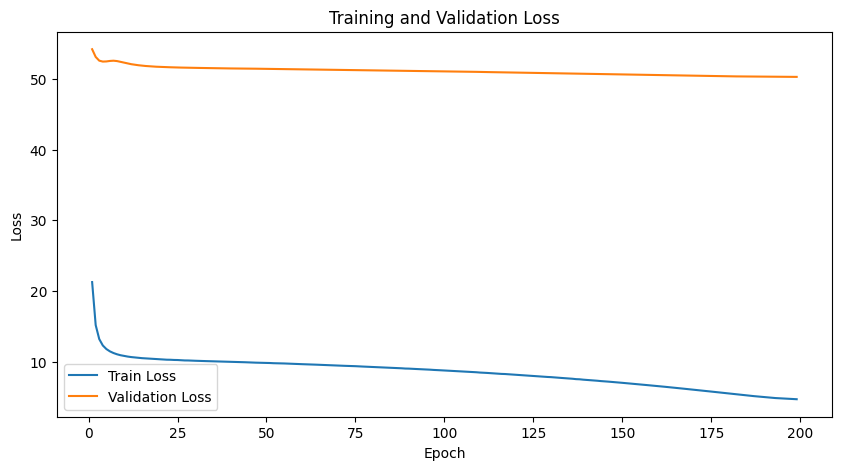

In [ ]:
import matplotlib.pyplot as plt

def plot_training_metrics(train_results):
    epochs = train_results['epoch']
    train_loss = train_results['train/loss']
    val_loss = train_results['val/loss']

    plt.figure(figsize=(10, 5))

    plt.plot(epochs, train_loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')

    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Assuming you have the train_results available
plot_training_metrics(model.ckpt['train_results'])


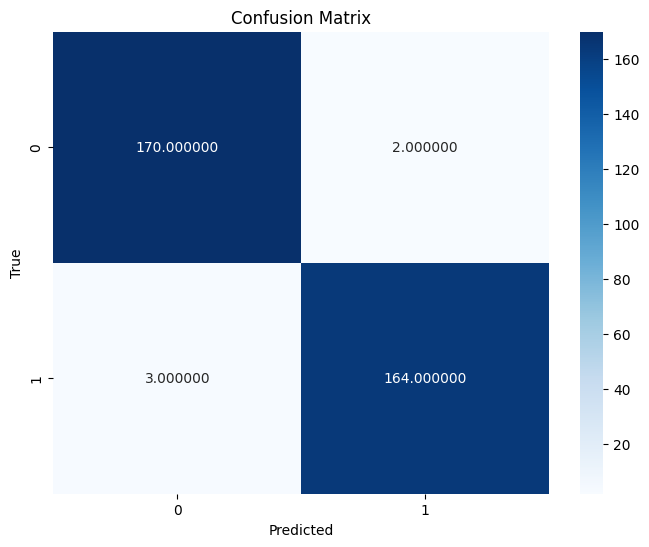

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(confusion_matrix):
    cm = confusion_matrix.matrix  # Access the confusion matrix array
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="f", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(model.metrics.confusion_matrix)


In [ ]:
import numpy as np

def calculate_metrics(confusion_matrix):
    cm = confusion_matrix.matrix  # This is the confusion matrix array

    # Calculate Accuracy
    accuracy = np.trace(cm) / np.sum(cm)

    # Calculate Precision and Recall for each class
    precision = np.diag(cm) / np.sum(cm, axis=0)
    recall = np.diag(cm) / np.sum(cm, axis=1)

    # Handle NaNs (which might occur if a class has no predictions or no true instances)
    precision = np.nan_to_num(precision)
    recall = np.nan_to_num(recall)

    # Average precision and recall (macro average)
    avg_precision = np.mean(precision)
    avg_recall = np.mean(recall)

    return accuracy, avg_precision, avg_recall, precision, recall

# Extract and calculate the metrics
accuracy, avg_precision, avg_recall, precision, recall = calculate_metrics(model.metrics.confusion_matrix)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")

# If you want to see precision and recall for each class:
class_names = ['Real', 'Fake']  # Adjust based on your classes
for i, class_name in enumerate(class_names):
    print(f"{class_name} - Precision: {precision[i]:.4f}, Recall: {recall[i]:.4f}")


Accuracy: 0.9853
Average Precision: 0.9853
Average Recall: 0.9852
Real - Precision: 0.9827, Recall: 0.9884
Fake - Precision: 0.9880, Recall: 0.9820


## CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to the dataset directories
train_dir = 'processed_dataset/train'
val_dir = 'processed_dataset/val'

# Create ImageDataGenerator instances for data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=20,
                                   zoom_range=0.15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.15,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

val_datagen = ImageDataGenerator(rescale=1.0/255)

# Load data from the directories
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')


Found 1354 images belonging to 2 classes.
Found 339 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_cnn_model(input_shape, num_classes):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    return model

# Get the number of classes from the training generator
input_shape = (224, 224, 3)
num_classes = len(train_generator.class_indices)

# Build and compile the model
model = build_cnn_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    validation_data=val_generator,
                    validation_steps=val_generator.samples // val_generator.batch_size,
                    epochs=20)
model.save('cnn_classifier.h5')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 397ms/step - accuracy: 0.5743 - loss: 1.7630 - val_accuracy: 0.8844 - val_loss: 0.3261
Epoch 2/10
 1/42 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9062 - loss: 0.3229

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9062 - loss: 0.3229 - val_accuracy: 1.0000 - val_loss: 0.1793
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 355ms/step - accuracy: 0.8654 - loss: 0.3603 - val_accuracy: 0.9187 - val_loss: 0.3243
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.8438 - loss: 0.3985 - val_accuracy: 0.9474 - val_loss: 0.3115
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 362ms/step - accuracy: 0.8783 - loss: 0.3400 - val_accuracy: 0.9344 - val_loss: 0.2162
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.9375 - loss: 0.2508 - val_accuracy: 1.0000 - val_loss: 0.1472
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 364ms/step - accuracy: 0.8943 - loss: 0.2824 - val_accuracy: 0.9406 - val_loss: 0.1597
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.8750 - loss: 0.5052 - val_accuracy: 1.0000 - val_loss: 0.0810
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 365ms/step - accuracy: 0.9280 - loss: 0.2203 - val_accuracy: 0.9406 - v

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import numpy as np

# Make predictions on the validation set
val_generator.reset()
y_pred_probs = model.predict(val_generator, steps=val_generator.samples // val_generator.batch_size + 1)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_generator.classes

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Print precision and recall for each class
class_names = list(train_generator.class_indices.keys())
for i, class_name in enumerate(class_names):
    class_precision = precision_score(y_true, y_pred, labels=[i], average='macro')
    class_recall = recall_score(y_true, y_pred, labels=[i], average='macro')
    print(f"{class_name} - Precision: {class_precision:.4f}, Recall: {class_recall:.4f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step
Accuracy: 0.5133
Precision: 0.5136
Recall: 0.5136
Fake - Precision: 0.5244, Recall: 0.4971
Real - Precision: 0.5029, Recall: 0.5301


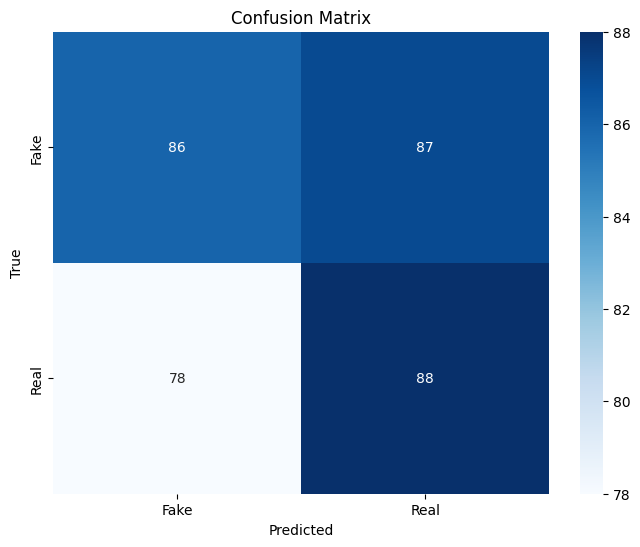

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np

# Load the trained YOLOv8 model
model = YOLO('/content/runs/classify/train4/weights/best.pt')  # replace with the actual path to your trained YOLOv8 model

# Function to perform inference on a single image
def predict_yolo(image_path):
    results = model.predict(image_path)


# Perform inference on a new image
predict_yolo('/content/dataset/Real/G_NT_5s_g_E_20_1.mp4')  # replace with the actual path to your image




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/309) /content/dataset/Real/G_NT_5s_g_E_20_1.mp4: 224x224 Real 0.97, Fake 0.03, 3.2ms
video 1/1 (frame 2/309) /content/dataset/Real/G_NT_5s_g_E_20_1.mp4: 224x224 Real 0.98, Fake 0.02, 3.0ms
video 1/1 (frame 3/309) /content/dataset/Real/G_NT_5s_g_E_20_1.mp4: 224x224 Real 0.98, Fake 0.02, 2.9ms
video 1/1 (frame 4/309) /content/dataset/Real/G_NT_5s_g_E_20_1.mp4: 224x224 Real 0.97, Fake 0.03, 3.2ms
video 1/1 (frame 5/309) /content/dataset

In [ ]:
# Assuming you have already trained your model
model.save('cnn_classifier.h5')


In [ ]:
import tensorflow as tf
import cv2
import numpy as np

# Load the trained CNN model
model = tf.keras.models.load_model('/content/cnn_classifier.h5')

# Function to perform inference on a single image
def predict_cnn(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (224, 224))  # Resize to the size expected by the model
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img / 255.0  # Normalize

    # Perform inference
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions, axis=1)
    confidence = np.max(predictions)

    # Mapping the predicted class to class name
    class_names = ['Real', 'Fake']  # Adjust based on your dataset classes
    predicted_class_name = class_names[predicted_class[0]]

    print(f"Predicted class: {predicted_class_name} with confidence: {confidence:.4f}")

# Perform inference on a new image
predict_cnn('/content/processed_dataset/val/Fake/Fake_G_NT_ZTE_g_E_20_44_0.jpg')  # replace with the actual path to your image


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step
Predicted class: Fake with confidence: 0.9165
